**Question 3 - Data visualization**

Uber’s Driver team is interested in predicting which driver signups are most likely to start driving. To help explore this question, we have provided a sample dataset of a cohort of driver signups. The data was pulled a some time after they signed up to include the result of whether they actually completed their first trip. It also includes several pieces of background information gathered about the driver and their car.<br>

We would like you to use this data set to help understand what factors are best at **predicting whether a signup will start to drive within 30 days of signing up**, and offer suggestions to operationalize those insights to help Uber.<br>

See below for a description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge. Please also call out any data
related assumptions or issues that you encounter.

- [Part A](#Part_A)
 1. [Data Cleaning](#Part_A1)
 2. [Assigning Target Variable](#Part_A2)
 
 
- [Part B](#Part_B)
 1. [numeric variable visualization](#Part_A31)
 2. [correlation heatmap visualization](#Part_A32)
 3. [categorical variable visualization](#Part_A33)


- [Part C](#Part_C)


# Part A  <a id='Part_A'></a>

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the driver signups took a first trip within 30 days of signing up?

**Answer:**<br>
50.24 % of driver signup did not took a first trip within 30 days <br>
49.76 % of driver signup took the first trip with in 30 days 

In [1]:
# import library
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data set
df = pd.read_csv("product_ds_exercise_2018_h2_dataset.csv")

# check number of record
print("the data set have {} records".format(df.shape[0]))

# check target variable missing or not
print("number of missing signup_timestamp is {}".format(df["signup_timestamp"].isnull().sum()))

# drop the signup_tstp null, and check the record again
df = df[df["signup_timestamp"].notnull()]
print("the data set (after remove the missing signup_timestamp) have {} records".format(df.shape[0]))

the data set have 12357 records
number of missing signup_timestamp is 1163
the data set (after remove the missing signup_timestamp) have 11194 records


Since there are 1163 driver has missing signup timestamp, even we have other information in terms of this driver signup, we can not calculate or estimate whether this driver signup leads to a first competed trip within 30 days or not. I chose to delete these 1,163 records.

#### 1. Data Cleaning  <a id='Part_A1'></a>

In [3]:
# Data Cleaning #
# convert type(object) to type(date)
df["signup_timestamp"] = pd.to_datetime(df["signup_timestamp"])
df["bgc_date"] = pd.to_datetime(df["bgc_date"])
df["vehicle_added_date"] = pd.to_datetime(df["vehicle_added_date"])
df["first_completed_trip_timestamp"] = pd.to_datetime(df["first_completed_trip_timestamp"])

# creating "missing" for categorical variable
df['signup_os'] = np.where(df["signup_os"].notnull(), df["signup_os"], "missing")
df['signup_channel'] = np.where(df["signup_channel"].notnull(), df["signup_channel"], "missing")
df['vehicle_make'] = np.where(df["vehicle_make"].notnull(), df["vehicle_make"], "missing")

# create missing indicator for numeric varaible
df['bgc_date_known'] = df['bgc_date'].notnull()
df['vehicle_added_date_known'] = df['vehicle_added_date'].notnull()

#### 2. Assigning Target Variable  <a id='Part_A2'></a> 

In [4]:
# create the target varaible - took a first trip within 30 days of signing up 
df['signup2firsttrip_in30'] = np.where((df["first_completed_trip_timestamp"] - df["signup_timestamp"]).dt.days <= 30, 1, 0)
# check how many people start first trip with in 30 days
df['signup2firsttrip_in30'].value_counts()/df['signup2firsttrip_in30'].value_counts().sum()
# 1 means took the first trip within 30 days since signup, 
# 0 means did not complete the first trip within 30 days since signup

1    0.549312
0    0.450688
Name: signup2firsttrip_in30, dtype: float64

# Part B  <a id='Part_B'></a>

- Create 3-5 charts to help the Driver team visualize key patterns in the data. 
- Are there any patterns that appear to predict whether a signup will start to drive within 30 days of signing up?

**1. Visualization for numeric attribute**  <a id='Part_A31'></a>

Take away from the following numeric variable distribution:<br>
- The distribution of vehicle year between the took and not take 1st trip group is very similar. Successfully complete the trip group's vehicle year is more recent than the not compete group.
- the distribution of signup to vehicle added date is a normal distribution for the "took the trip" group, centering at zero, means most drivers who took their 1st trip within 30 days add their vehicle on the signup day. In contrast, the "fail took the trip" group's distribution is much more spread out and has the fat right tail, meaning those drivers took a very long time to add their vehicle.
- the distribution of day from signup to driver agreed to pursue background check shows the "took the trip group" is overall quicker to consented than the "not took" group.

In [5]:
# feature engineering before model
# for date varaible
df["signup2bgc_m"] = (df["bgc_date"] - df["signup_timestamp"])/np.timedelta64(1,'m')
df["signup2vad_m"] = (df["vehicle_added_date"] - df["signup_timestamp"])/np.timedelta64(1,'m')

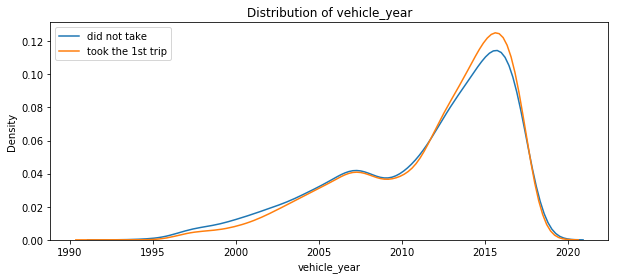

In [6]:
plt.figure(figsize = (10, 4))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['signup2firsttrip_in30'] == 0, 'vehicle_year'] , label = 'did not take')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['signup2firsttrip_in30'] == 1, 'vehicle_year'] , label = 'took the 1st trip')

# Labeling of plot
plt.xlabel('vehicle_year'); plt.ylabel('Density'); plt.title('Distribution of vehicle_year');

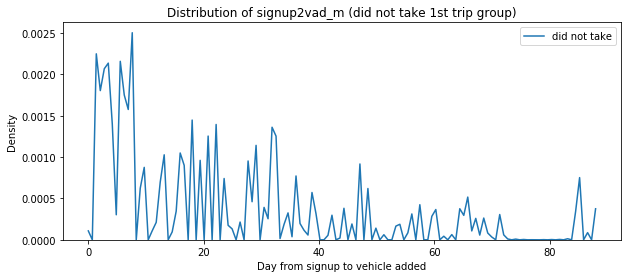

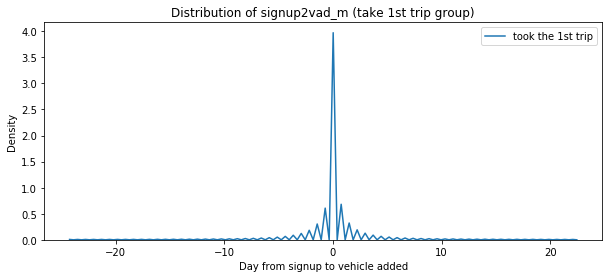

In [7]:
plt.figure(figsize = (10, 4))
plt.figure(1)

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['signup2firsttrip_in30'] == 0, 'signup2vad_m']/(60*24) , label = 'did not take')

# Labeling of plot
plt.xlabel('Day from signup to vehicle added'); plt.ylabel('Density'); plt.title('Distribution of signup2vad_m (did not take 1st trip group)');

plt.figure(figsize = (10, 4))
plt.figure(2)

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['signup2firsttrip_in30'] == 1, 'signup2vad_m']/(60*24) , label = 'took the 1st trip')

# Labeling of plot
plt.xlabel('Day from signup to vehicle added'); plt.ylabel('Density'); plt.title('Distribution of signup2vad_m (take 1st trip group)');

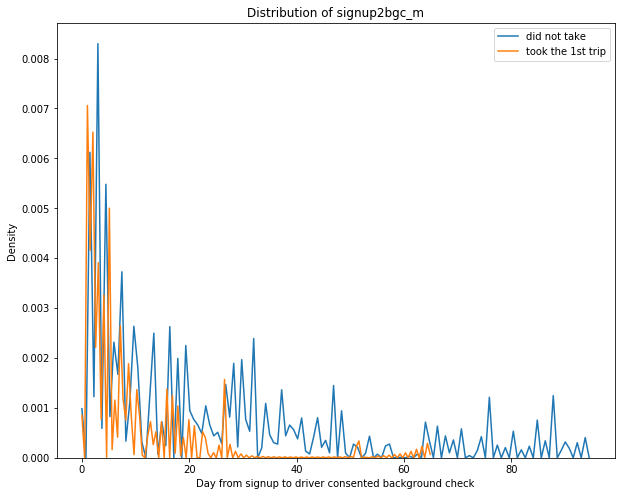

In [8]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df['signup2firsttrip_in30'] == 0, 'signup2bgc_m']/(60*24) , label = 'did not take')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df['signup2firsttrip_in30'] == 1, 'signup2bgc_m']/(60*24) , label = 'took the 1st trip')

# Labeling of plot
plt.xlabel('Day from signup to driver consented background check'); plt.ylabel('Density'); plt.title('Distribution of signup2bgc_m');

#### **2. correlation between target variable and the numeric varaibles**  <a id='Part_A32'></a>

Take away from the correlation result:<br>
- the day from signup to vehicle added date is highly correlated with the day from signup to driver agreed to pursue background check
- the days between signup to background check consent is most correlated to whether the driver is going to complete the first trip in 30 days, but the correlation is still limited.


In [9]:
# Extract the EXT_SOURCE variables and show correlations
corrs_data = df[['signup2firsttrip_in30', 'signup2bgc_m', 'signup2vad_m', 'vehicle_year']]
corrs_data = corrs_data.corr()
corrs_data

signup2firsttrip_in30  signup2bgc_m  signup2vad_m  \
signup2firsttrip_in30               1.000000     -0.110313     -0.081554   
signup2bgc_m                       -0.110313      1.000000      0.494575   
signup2vad_m                       -0.081554      0.494575      1.000000   
vehicle_year                        0.042088     -0.020398      0.001794   

                       vehicle_year  
signup2firsttrip_in30      0.042088  
signup2bgc_m              -0.020398  
signup2vad_m               0.001794  
vehicle_year               1.000000

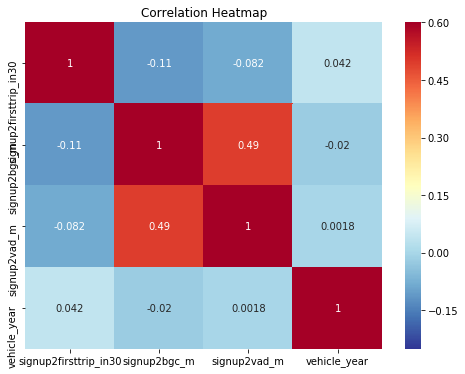

In [10]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(corrs_data, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

#### 3. Visualization for categorical variable  <a id='Part_A33'></a>

Take away from the categorical attributes visualization:<br>
- the completion rate across city is very close.
- the completion rate across signup os, the ios_web shows the top completion rate 59.5%, while missing shows the lowest completion rate 51.6%.
- the completion rate across signup channel, the Referral shows the top completion rate 62%, while R2D shows the lowest completion rate 45%.
- the completion rate across vehicle make, the vehicle makes with top three competion rate are Acura, Kia, and Toyota
- the completion rate across vehicle model, the vehicle makes with top three competion rate are Sienna,Optima, Focus

In [11]:
# categorical varaible uniqure value
df.drop(['id'],axis = 1).select_dtypes('object').apply(pd.Series.nunique, axis = 0)

city_name           3
signup_os           6
signup_channel      6
vehicle_make       48
vehicle_model     473
dtype: int64

vehicle_model has 473 types, while the vehicle make has 47 types. These categorical value are way too much for us to generalize any useful information. So I decide to group an categorical variable less than 1%

In [12]:
# aggragate categorical value less than 1% in to group 'other'
def cat_other_ind(df,vat_var):
    var_tab = df[vat_var].value_counts()
    less_10 = var_tab[var_tab/var_tab.sum() < 0.01].index
    
    l = ('|').join(less_10)
    m = df[vat_var].str.contains(l)
    
    df[vat_var] = np.where(m, 'Other', df[vat_var])

cat_other_ind(df,"vehicle_make")
cat_other_ind(df,"vehicle_model")

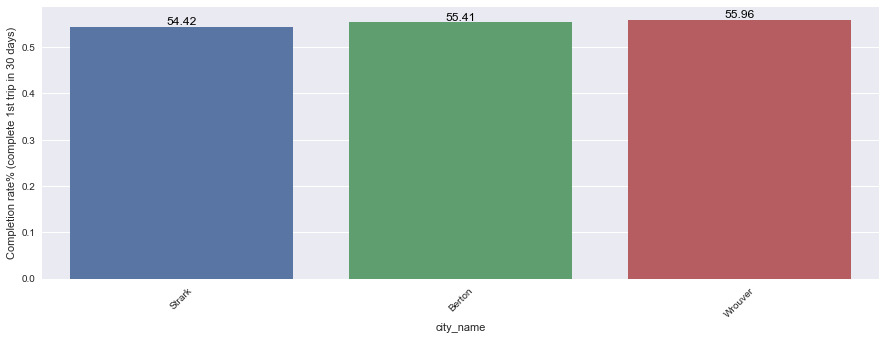

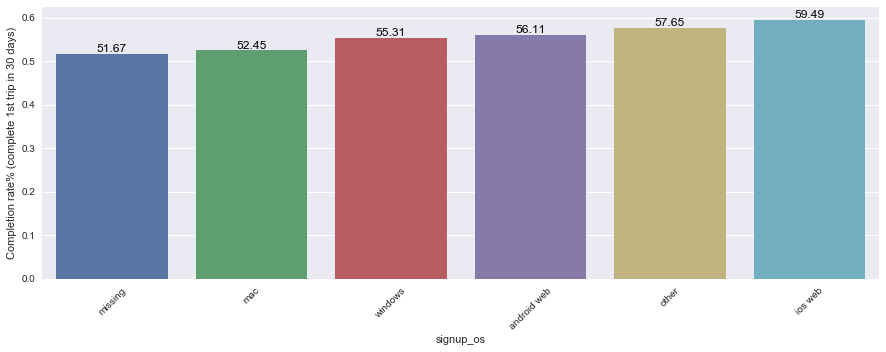

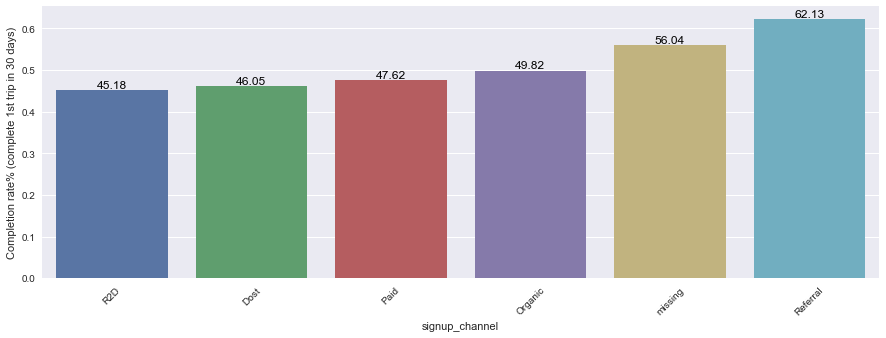

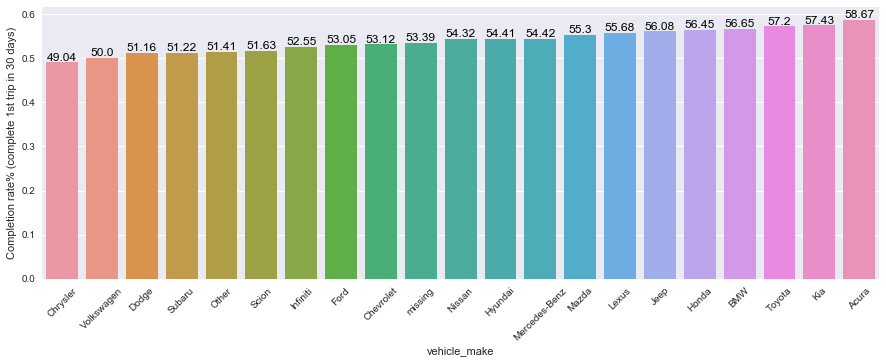

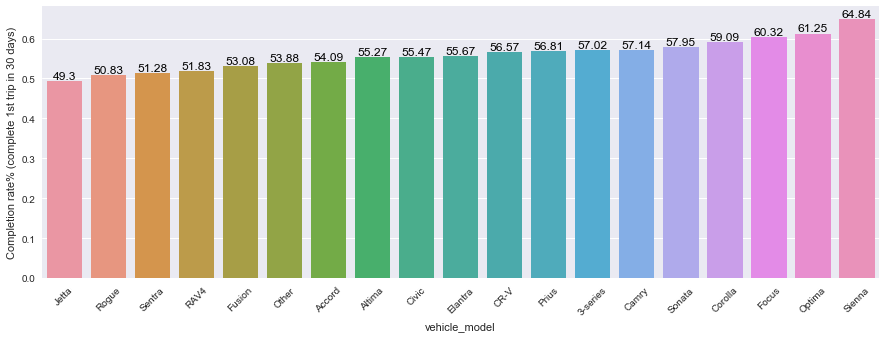

In [13]:
cat_var = df.drop(["id"],axis=1).select_dtypes('object').apply(pd.Series.nunique, axis = 0).index

# plot the bar plot
sns.set(rc={'figure.figsize':(15,5)})

for i, var in enumerate(cat_var):
    plt.figure(i)
    groupedvalues=df.groupby(var).mean().sort_values("signup2firsttrip_in30").reset_index()
    g=sns.barplot(x=var, y="signup2firsttrip_in30", data=groupedvalues, ci = None)
    for index, row in groupedvalues.iterrows():
        g.text(row.name,row.signup2firsttrip_in30,round(100 * row.signup2firsttrip_in30,2), color='black',ha='center', va='bottom')

        g.set_xticklabels(g.get_xticklabels(), rotation=45)
    
    # Labeling of plot
    plt.ylabel('Completion rate% (complete 1st trip in 30 days)');

# Part C  <a id='Part_C'></a>

Hypothesize how Uber might leverage the insights gained from the data to generate more first trips (again, a few ideas/sentences will suffice).

Based on the finding by the visualization above, we might be able to leverage the following key takeaway:

1. The Uber Driver Team could re-assess the steps or interface driver need to add his/her, as well as the steps driver, need to pursue background check. By improving the user experience, e.g. make the interface more straightforward and effortless to use, might lead to a decrease for the time driver need to add the info, and further drive the completion rate.

2. Since the "ios web" has the highest completion rate among the signup os while the "Referral" channel has the highest completion rate among the signup channel, The Uber Driver Team could conduct some target campaign in those two areas to further increase the completion rate.

Since the visualization and analysis above is distribution analysis, further steps, like statistical testing, should be conducted to measure whether there is a statistically significant difference.
Modeling approach can also be leveraged to assess which attribute or a combination of attributes derive the best predict.
